Importing the necessary libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import warnings
warnings.filterwarnings('ignore')

import math
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

Importing train and test csv files using pandas libraries.

In [4]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

In [5]:
data_train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


Pre-processing steps

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [7]:
data_train.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [8]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0


In [9]:
data_train = data_train.drop('id', axis=1)
#data_test = data_test.drop('id', axis=1)

Plots

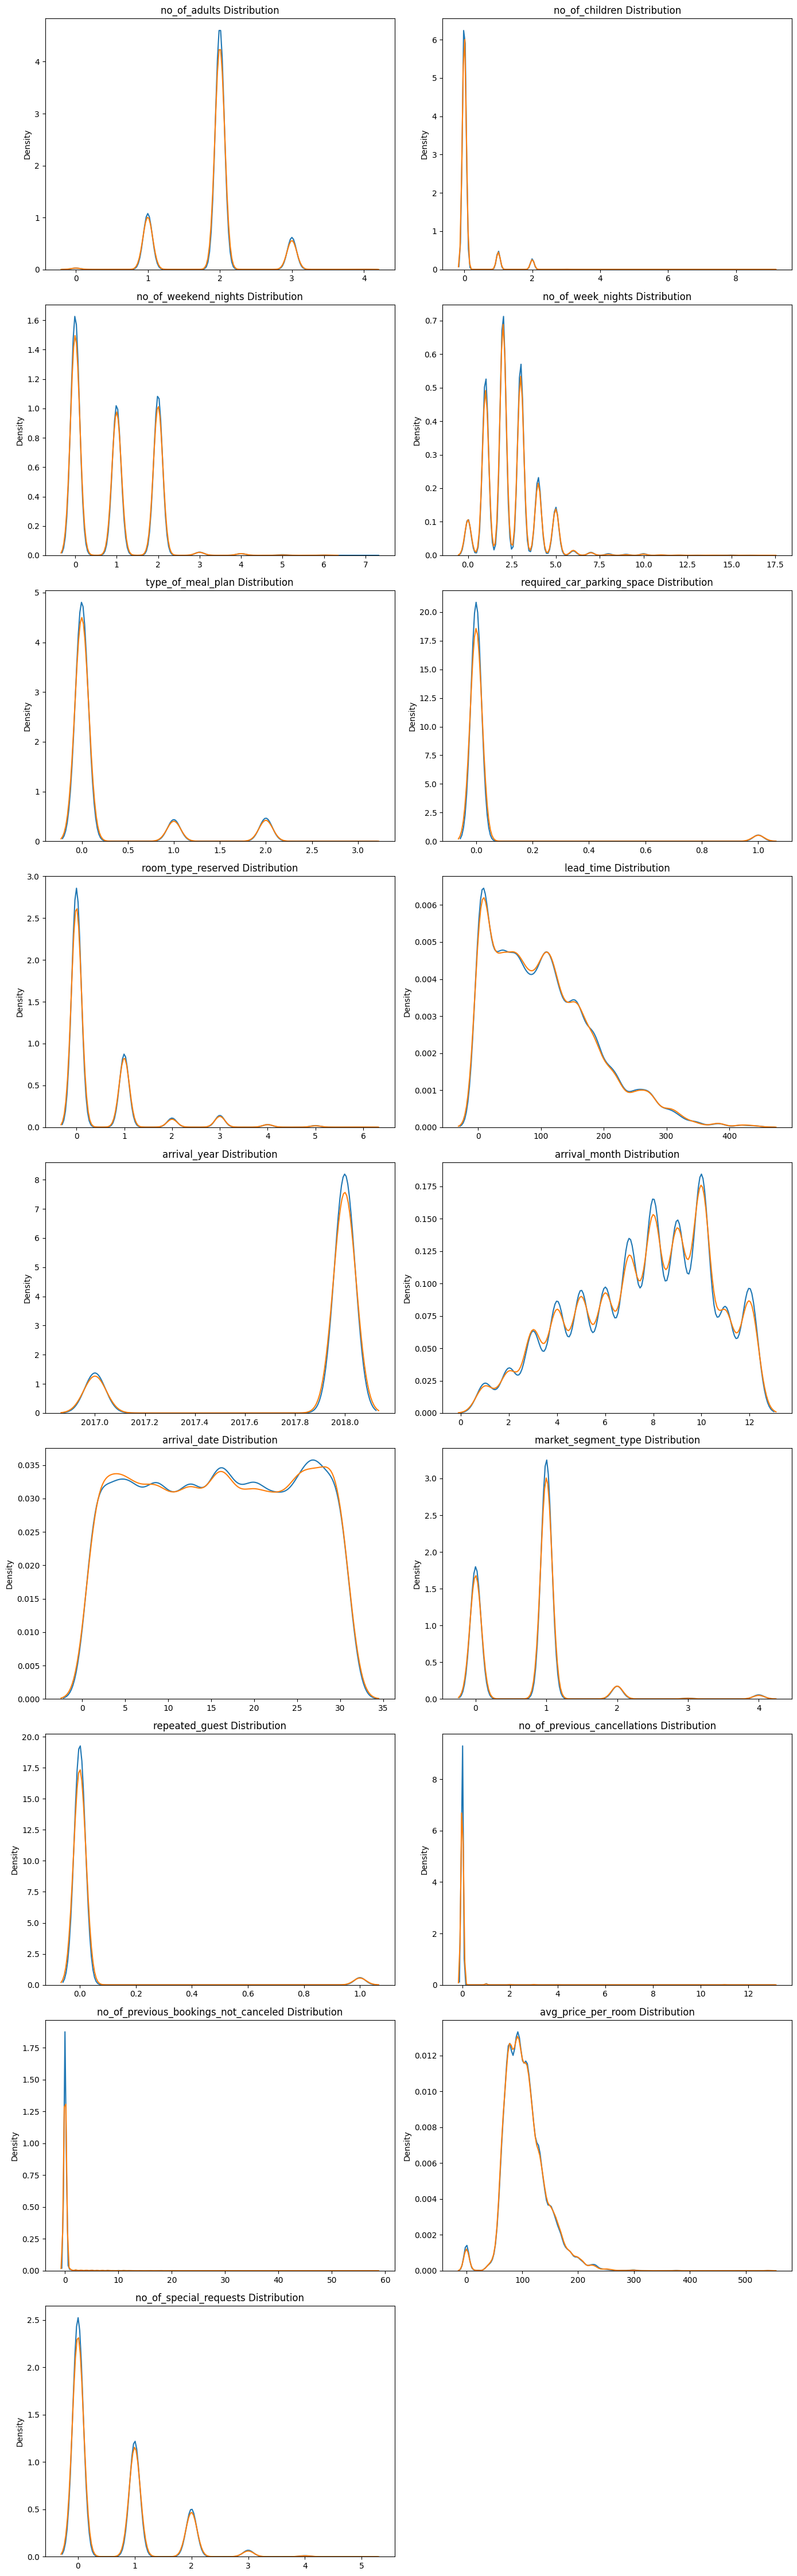

In [10]:
n_bins = 50

features = data_train.columns[:-1]

columns = features
n_cols = 2
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
        data_train[column], label='Train',
        ax=ax[i]#, color=colors[1]
    )
   
    sns.kdeplot(
        data_test[column], label='Test',
        ax=ax[i]#, color=colors[2]
    )

    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

#fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)
plt.tight_layout()

In [11]:
target="booking_status"
skew_df = pd.concat((data_train.drop(target,axis =1), data_test), axis =0).skew(numeric_only=True).sort_values()
print("Skewness:\n") 
display(skew_df)

Skewness:



arrival_year                            -2.033326
arrival_month                           -0.378229
no_of_adults                            -0.249363
arrival_date                            -0.012962
id                                       0.000000
no_of_weekend_nights                     0.532105
lead_time                                0.832361
avg_price_per_room                       0.871223
no_of_special_requests                   1.223620
market_segment_type                      1.306956
no_of_week_nights                        1.332154
type_of_meal_plan                        2.322193
room_type_reserved                       2.567361
no_of_children                           3.536276
repeated_guest                           5.530748
required_car_parking_space               5.963291
no_of_previous_bookings_not_canceled    16.554106
no_of_previous_cancellations            25.972329
dtype: float64

In [12]:
kurtosis_df = pd.concat((data_train.drop(target,axis =1), data_test), axis =0).kurtosis().sort_values()
print("Kurtosis value\n")
display(kurtosis_df)

Kurtosis value



arrival_date                             -1.219057
id                                       -1.200000
arrival_month                            -0.696264
no_of_weekend_nights                     -0.267969
lead_time                                 0.401312
no_of_special_requests                    0.956463
no_of_adults                              1.091170
arrival_year                              2.134476
type_of_meal_plan                         3.918599
avg_price_per_room                        4.249832
no_of_week_nights                         5.732366
market_segment_type                       5.822590
room_type_reserved                        7.580126
no_of_children                           16.320156
repeated_guest                           28.589988
required_car_parking_space               33.561795
no_of_previous_bookings_not_canceled    340.604641
no_of_previous_cancellations            773.332571
dtype: float64

Outlier detection

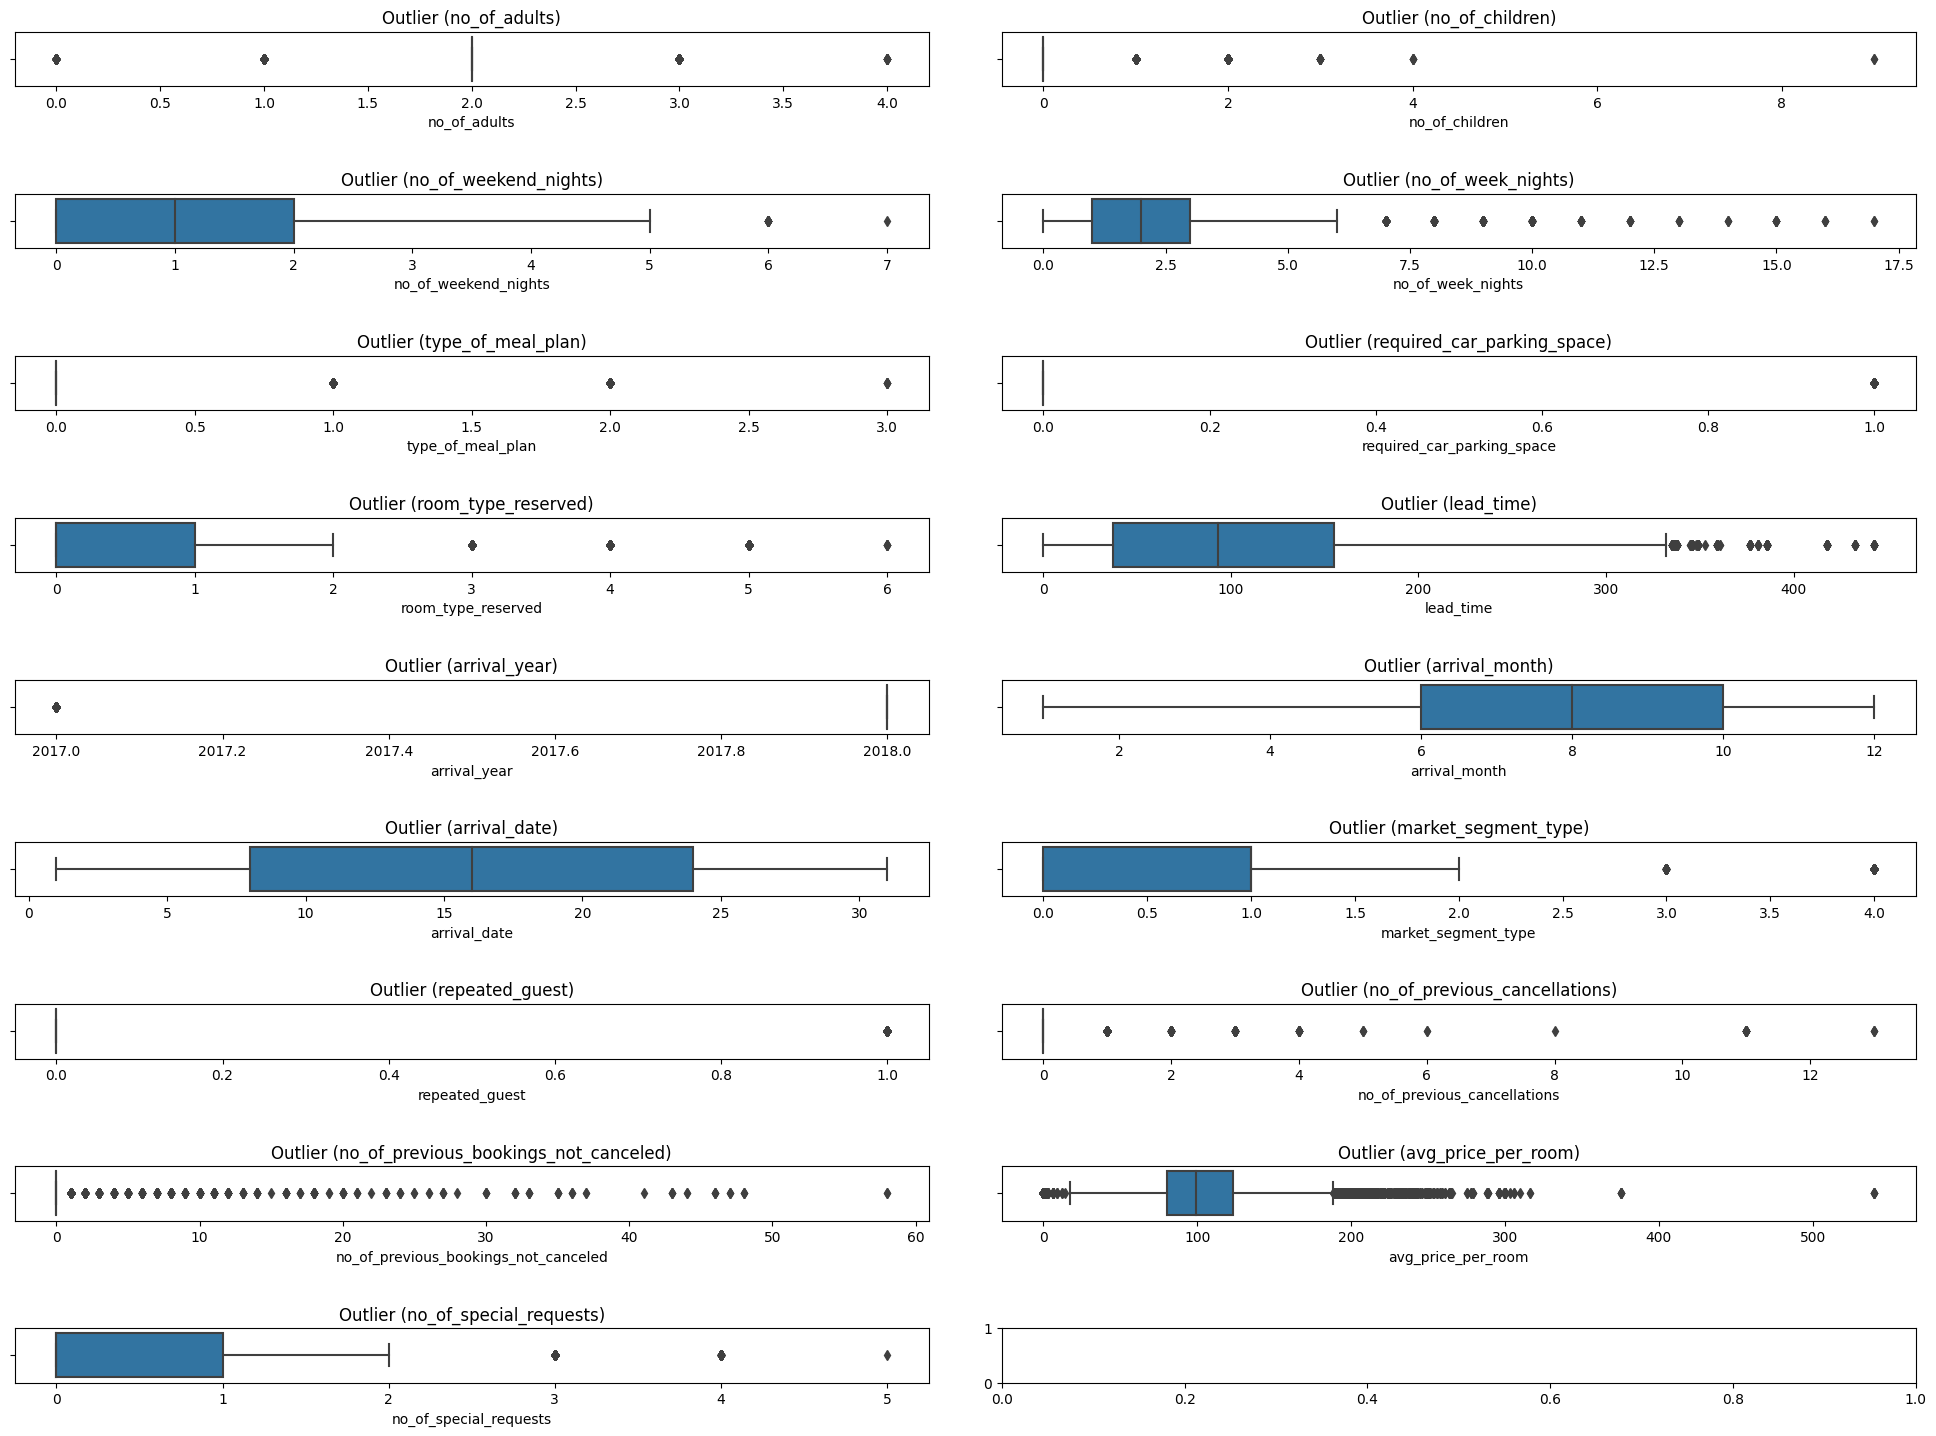

In [13]:
fig,ax = plt.subplots(int(np.ceil(len(columns)/2)), 2, figsize = (20,15))
y=0
for i,col in enumerate(columns):
    k, j = divmod(y, 2)
    sns.boxplot(x=data_train[col], ax=ax[k,j])
    ax[k,j].set_title(f"Outlier ({col})")
    y=y+1
plt.tight_layout(pad=3)
plt.show()

Correlation plot

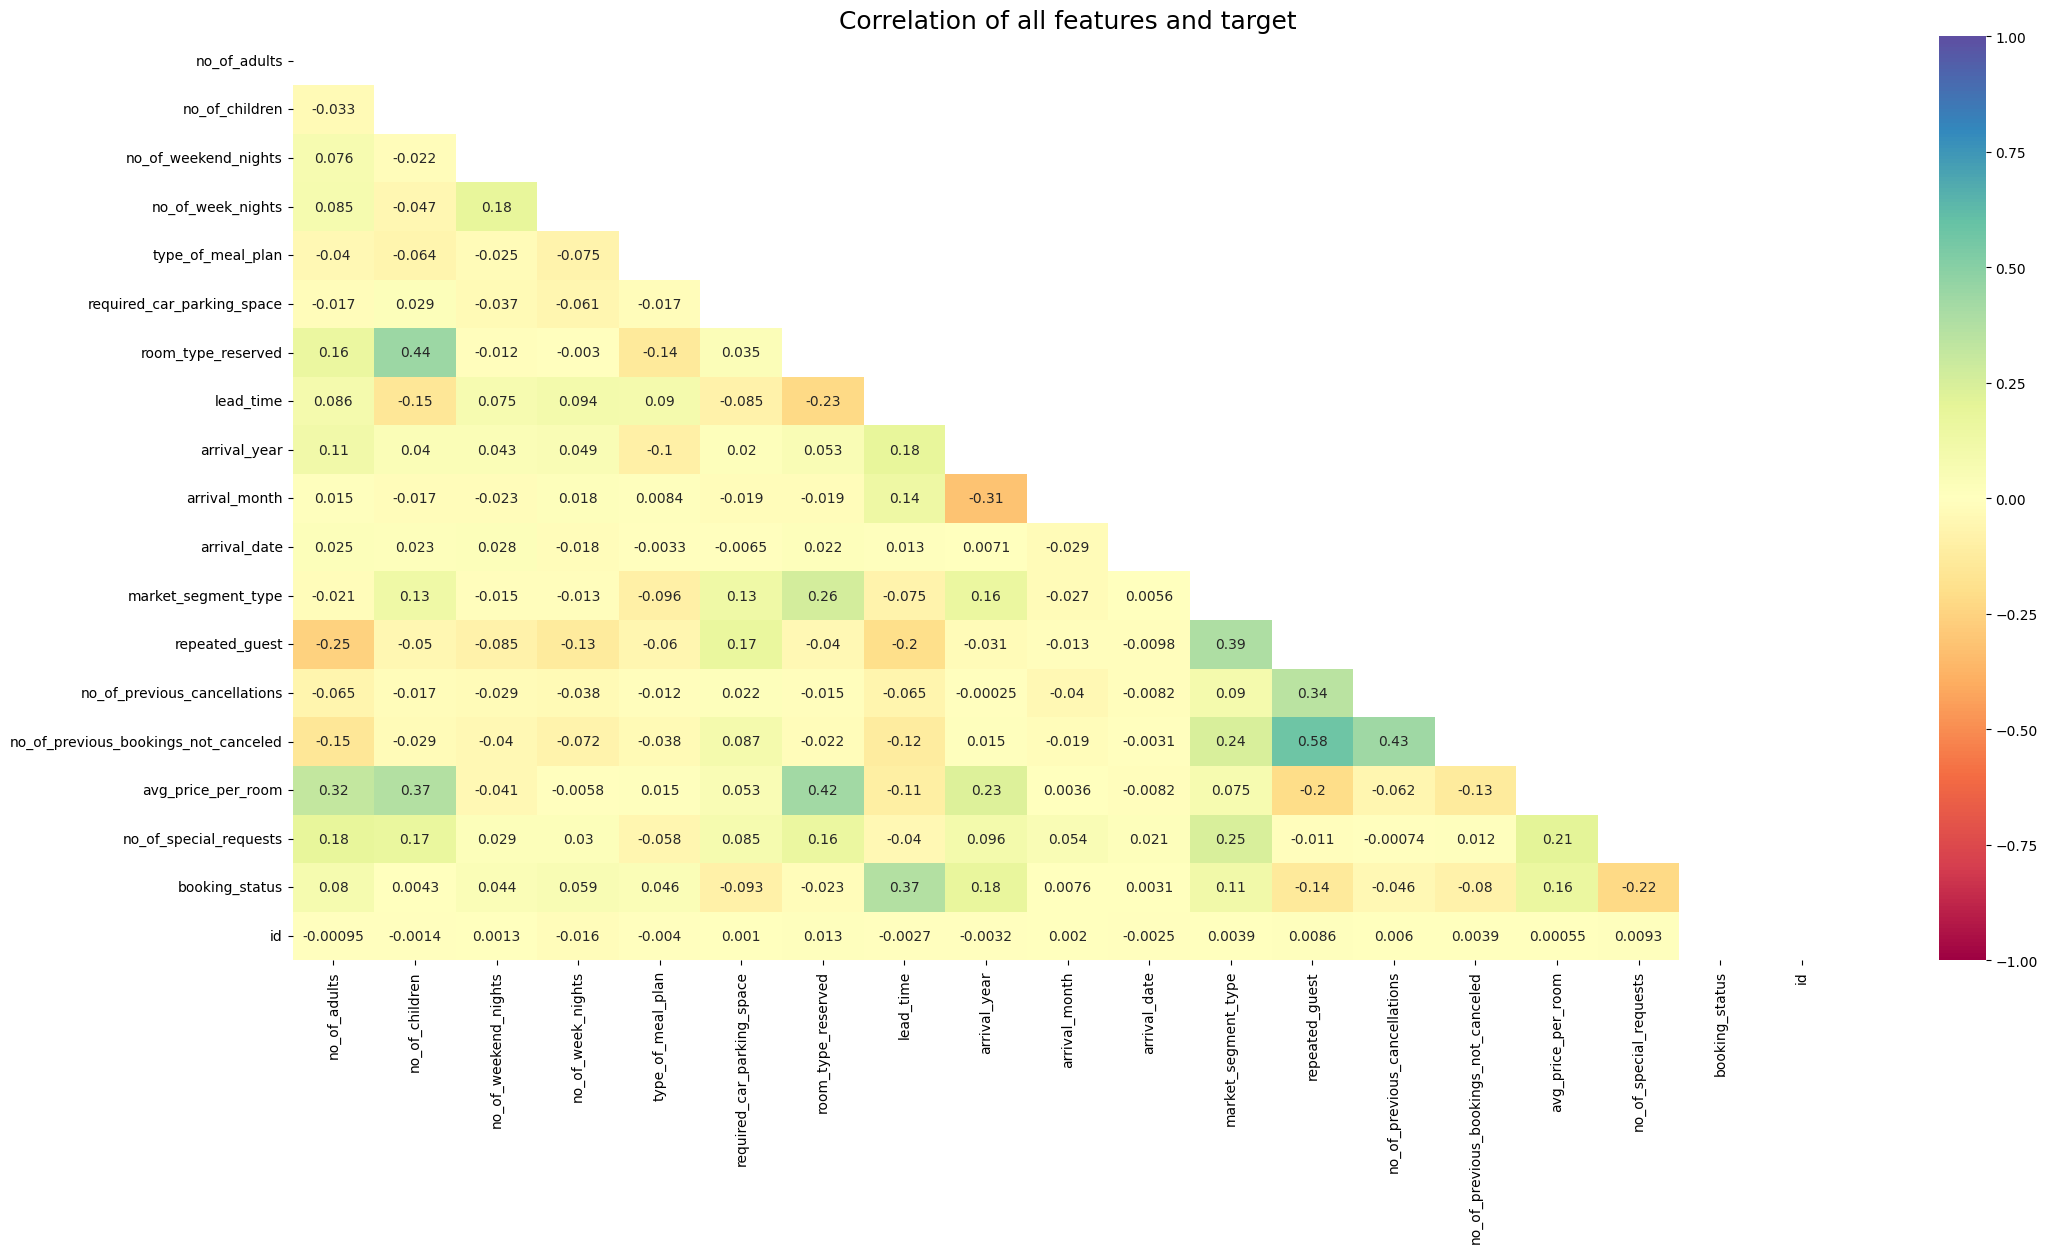

In [14]:
plt.figure(figsize = (25,12))

corr = pd.concat((data_train, data_test), axis =0).corr()
upper_triangle = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,vmin = -1, vmax = 1, cmap = "Spectral", annot = True, mask = upper_triangle)
plt.title("Correlation of all features and target", fontsize= 18)
plt.show()

In [15]:
x_all = data_train.drop('booking_status', axis = 1)
y_all = data_train['booking_status']

In [16]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [17]:
x_new = SelectKBest(f_classif).fit_transform(x_all, y_all)

In [18]:
skb = SelectKBest(f_classif)
skb = skb.fit(x_all, y_all)

# get a boolean mask indicating which features were selected
selected_features = skb.get_support()

# get the names of the selected features
selected_feature_names = x_all.columns[selected_features]

# print the names of the selected features
print(selected_feature_names)

Index(['no_of_adults', 'no_of_week_nights', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'market_segment_type', 'repeated_guest',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


In [19]:
x_new = pd.DataFrame(x_new, columns=selected_feature_names)
x_new = x_new.reset_index(drop=True)

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

In [ ]:
!pip install -U --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 353.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 10.9 MB/s eta 0:00:00
 

In [21]:
from pycaret import classification

In [22]:
classification.setup(x_new,target=y_all)# ,session_id=42)

,Description,Value
0,Session id,8914
1,Target,booking_status
2,Target type,Binary
3,Original data shape,"(42100, 11)"
4,Transformed data shape,"(42100, 11)"
5,Transformed train set shape,"(29469, 11)"
6,Transformed test set shape,"(12631, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


Comparing all the models

In [23]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8172,0.8903,0.7464,0.7783,0.7619,0.6137,0.6141,2.2210
lightgbm,Light Gradient Boosting Machine,0.8159,0.8888,0.7392,0.7798,0.7588,0.6101,0.6108,0.7170
gbc,Gradient Boosting Classifier,0.8037,0.8746,0.6930,0.7817,0.7346,0.5798,0.5826,2.7220
rf,Random Forest Classifier,0.7921,0.8616,0.7182,0.7431,0.7303,0.5613,0.5616,3.7640
ada,Ada Boost Classifier,0.7869,0.8630,0.7168,0.7337,0.7251,0.5511,0.5514,1.1380
et,Extra Trees Classifier,0.7806,0.8288,0.6962,0.7316,0.7132,0.5358,0.5364,3.6640
lda,Linear Discriminant Analysis,0.7629,0.8286,0.6625,0.7125,0.6865,0.4962,0.4972,0.2900
ridge,Ridge Classifier,0.7628,0.0000,0.6590,0.7139,0.6853,0.4954,0.4965,0.0850
lr,Logistic Regression,0.7608,0.8268,0.6541,0.7124,0.6819,0.4908,0.4920,2.0680
knn,K Neighbors Classifier,0.7595,0.8104,0.6644,0.7052,0.6841,0.4902,0.4909,0.7550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [24]:
from pycaret.classification import *

In [25]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8161,0.8895,0.7535,0.7722,0.7627,0.6126,0.6127
1,0.8249,0.8934,0.7543,0.7899,0.7717,0.6298,0.6302
2,0.8185,0.8897,0.7550,0.7758,0.7652,0.6173,0.6174
3,0.8174,0.8941,0.7550,0.7737,0.7642,0.6153,0.6155
4,0.8134,0.8835,0.7420,0.7728,0.7571,0.6057,0.6060
5,0.8140,0.8969,0.7403,0.7752,0.7573,0.6067,0.6071
6,0.8191,0.8952,0.7316,0.7912,0.7602,0.6154,0.6166
7,0.8195,0.8906,0.7515,0.7799,0.7654,0.6188,0.6191
8,0.8140,0.8837,0.7290,0.7818,0.7545,0.6051,0.6061


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

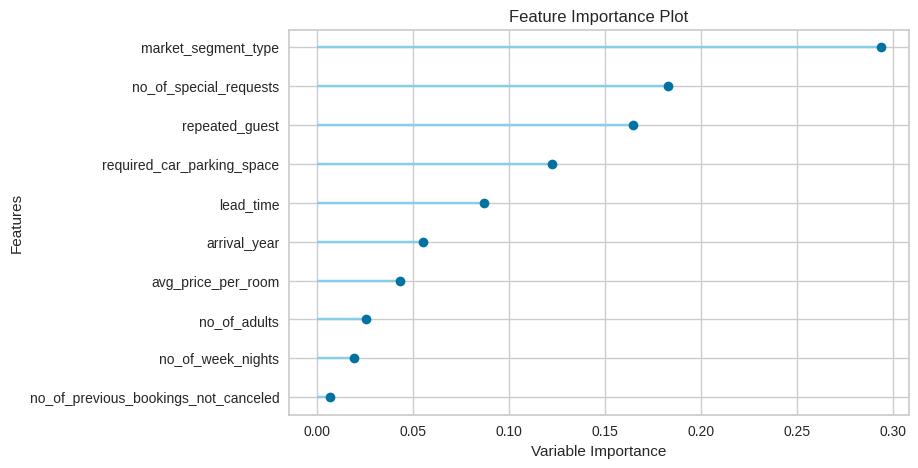

In [26]:
plot_model(xgb, plot = 'feature')

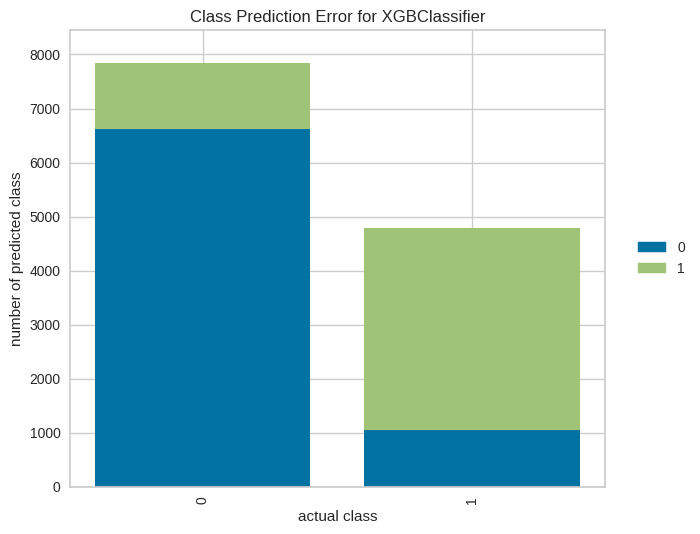

In [27]:
plot_model(xgb, plot = 'error')

In [28]:
predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8211,0.8914,0.7559,0.7808,0.7681,0.6225,0.6227


,no_of_adults,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,prediction_label,prediction_score
8180,2.0,4.0,0.0,228.0,2018.0,1.0,0.0,0.0,102.849998,1.0,1,1,0.7726
10004,3.0,1.0,0.0,1.0,2018.0,1.0,0.0,0.0,127.000000,2.0,0,0,0.9599
33658,2.0,2.0,0.0,28.0,2017.0,0.0,0.0,0.0,130.000000,0.0,0,0,0.9559
1224,2.0,2.0,1.0,65.0,2017.0,0.0,0.0,0.0,72.250000,1.0,0,0,0.9981
11269,2.0,2.0,0.0,23.0,2018.0,1.0,0.0,0.0,157.000000,0.0,1,1,0.7522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,2.0,3.0,0.0,97.0,2018.0,1.0,0.0,0.0,135.899994,2.0,1,0,0.7666
8340,2.0,2.0,0.0,101.0,2018.0,1.0,0.0,0.0,95.879997,0.0,1,1,0.6160
9029,2.0,5.0,0.0,226.0,2018.0,0.0,0.0,0.0,70.000000,1.0,0,0,0.8945
18576,3.0,1.0,0.0,49.0,2018.0,1.0,0.0,0.0,168.300003,0.0,1,1,0.7933


In [29]:
testpreds = predict_model(xgb, data=data_test)

In [30]:
pred_cols = set(testpreds.columns)
test_cols = set(data_test.columns)

# Find columns in test that are not in train
extra_cols = pred_cols - test_cols
extra_cols

{'prediction_label', 'prediction_score'}

In [31]:
y_xgb = testpreds['prediction_label']
y_xgb = y_xgb.values
y_xgb

array([0, 0, 0, ..., 0, 1, 1])

In [32]:
data_test_id = data_test['id']

In [33]:
output_xgb = pd.DataFrame({'ID': data_test_id,'booking_status': y_xgb})
output_xgb

,ID,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,1
...,...,...
28063,70163,1
28064,70164,0
28065,70165,0
28066,70166,1


Submission file 

In [34]:
output_xgb.to_csv('sample_submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
